### Load Libraries

In [44]:
from dtaidistance import dtw_visualisation as dtwvis
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
from dtaidistance import dtw
from collections import Counter
from tqdm import tqdm
import pandas as pd
import numpy as np

seed=42
import sys
sys.path.append('../../src/utils/')
import kmeans_clustering

In [40]:
# define path for raw data
basepath = '../../datasets/rawdata/rawdata_bse_500'

### Load Data

In [3]:
# load the raw data for all the tickers     
raw_data_df = kmeans_clustering.load_data(basepath)
raw_data_df.head(5)

Date  360ONE.NS   3MINDIA.NS  AARTIDRUGS.NS  AARTIIND.NS  AAVAS.NS  \
0 2008-01-01        NaN  2219.938232       8.231997     8.205057       NaN   
1 2008-01-02        NaN  2290.000244       8.045412     8.061668       NaN   
2 2008-01-03        NaN  2296.610840       7.992102     8.507766       NaN   
3 2008-01-04        NaN  2350.798096       7.818845     8.611327       NaN   
4 2008-01-07        NaN  2317.890137       7.698895     8.244885       NaN   

   ABBOTINDIA.NS  ABCAPITAL.NS  ABFRL.NS  ABSLAMC.NS  ...  WESTLIFE.NS  \
0     218.646301           NaN       NaN         NaN  ...          NaN   
1     218.646301           NaN       NaN         NaN  ...          NaN   
2     218.646301           NaN       NaN         NaN  ...          NaN   
3     218.646301           NaN       NaN         NaN  ...          NaN   
4     218.646301           NaN       NaN         NaN  ...          NaN   

   WHIRLPOOL.NS       WIT  YESBANK.NS     ZEEL.NS  ZENSARTECH.NS  \
0     20.545835       NaN   46.059605  132.546417      13.379485   
1     20.545835  3.416485   47.378914  131.031815      13.153117   
2     20.545835  3.437809   46.478580  131.113693      13.077665   
3     20.545835  3.236422   46.362694  129.947067      12.978204   
4     20.545835  3.262483   46.959938  128.145935      12.817004   

   ZFCVINDIA.NS  ZOMATO.NS  ZYDUSLIFE.NS  ZYDUSWELL.NS  
0    824.131165        NaN     32.730751           NaN  
1    814.548340        NaN     32.325195           NaN  
2    814.548340        NaN     32.345993           NaN  
3    815.506653        NaN     32.143211           NaN  
4    825.137329        NaN     32.039223           NaN  

[5 rows x 484 columns]

#### Prepocess the data

In [4]:
# choose approx five months of data
start_date = '2023-01-01'

# select last five months data and handle any missing values
stocks_df  = kmeans_clustering.preprocess(raw_data_df, start_date)

### 1. Using MinMaxScaler for scaling

In [5]:
# scale the data using minmax scaler
%time
scaled_df = kmeans_clustering.scaling(stocks_df, 'minmax')
X = scaled_df.T
X.head(3)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs


0         1         2         3         4         5    \
360ONE.NS      0.494520  0.469670  0.481186  0.514521  0.470125  0.487550   
3MINDIA.NS     0.000000  0.029079  0.164475  0.266415  0.238152  0.379362   
AARTIDRUGS.NS  0.903518  0.878881  0.850249  0.869559  0.853245  0.853911   

                    6         7         8         9    ...       96   \
360ONE.NS      0.509824  0.418910  0.543614  0.494217  ...  0.104833   
3MINDIA.NS     0.319605  0.200846  0.250533  0.269012  ...  0.545648   
AARTIDRUGS.NS  0.861569  0.874220  0.849583  0.861236  ...  0.994326   

                    97        98        99        100       101       102  \
360ONE.NS      0.059735  0.073326  0.084446  0.223447  0.180820  0.227153   
3MINDIA.NS     0.560927  0.726565  0.845037  0.772055  0.838666  0.741708   
AARTIDRUGS.NS  1.000000  0.950267  0.983979  0.903872  0.861482  0.858144   

                    103       104       105  
360ONE.NS      0.232713  0.276576  0.270398  
3MINDIA.NS     0.818556  0.797630  1.000000  
AARTIDRUGS.NS  0.869159  0.846128  0.832110  

[3 rows x 106 columns]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


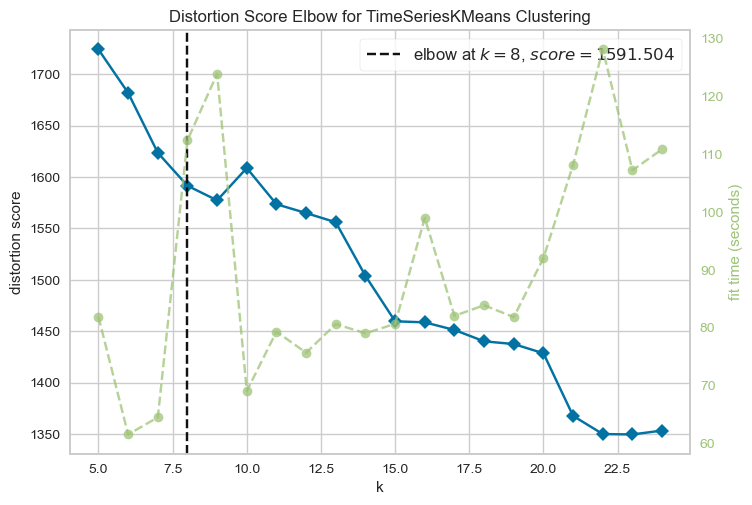

In [6]:
%time
kmeans_clustering.kelbow_visualizer(X)

#### Fit the data to cluster number as per elbow method

In [31]:
kmeans = TimeSeriesKMeans(n_clusters=8, n_jobs=-1, metric='dtw', random_state=seed)
minmax_cluster_labels = kmeans.fit_predict(X)

#### Plot ticker's timseries in clusters

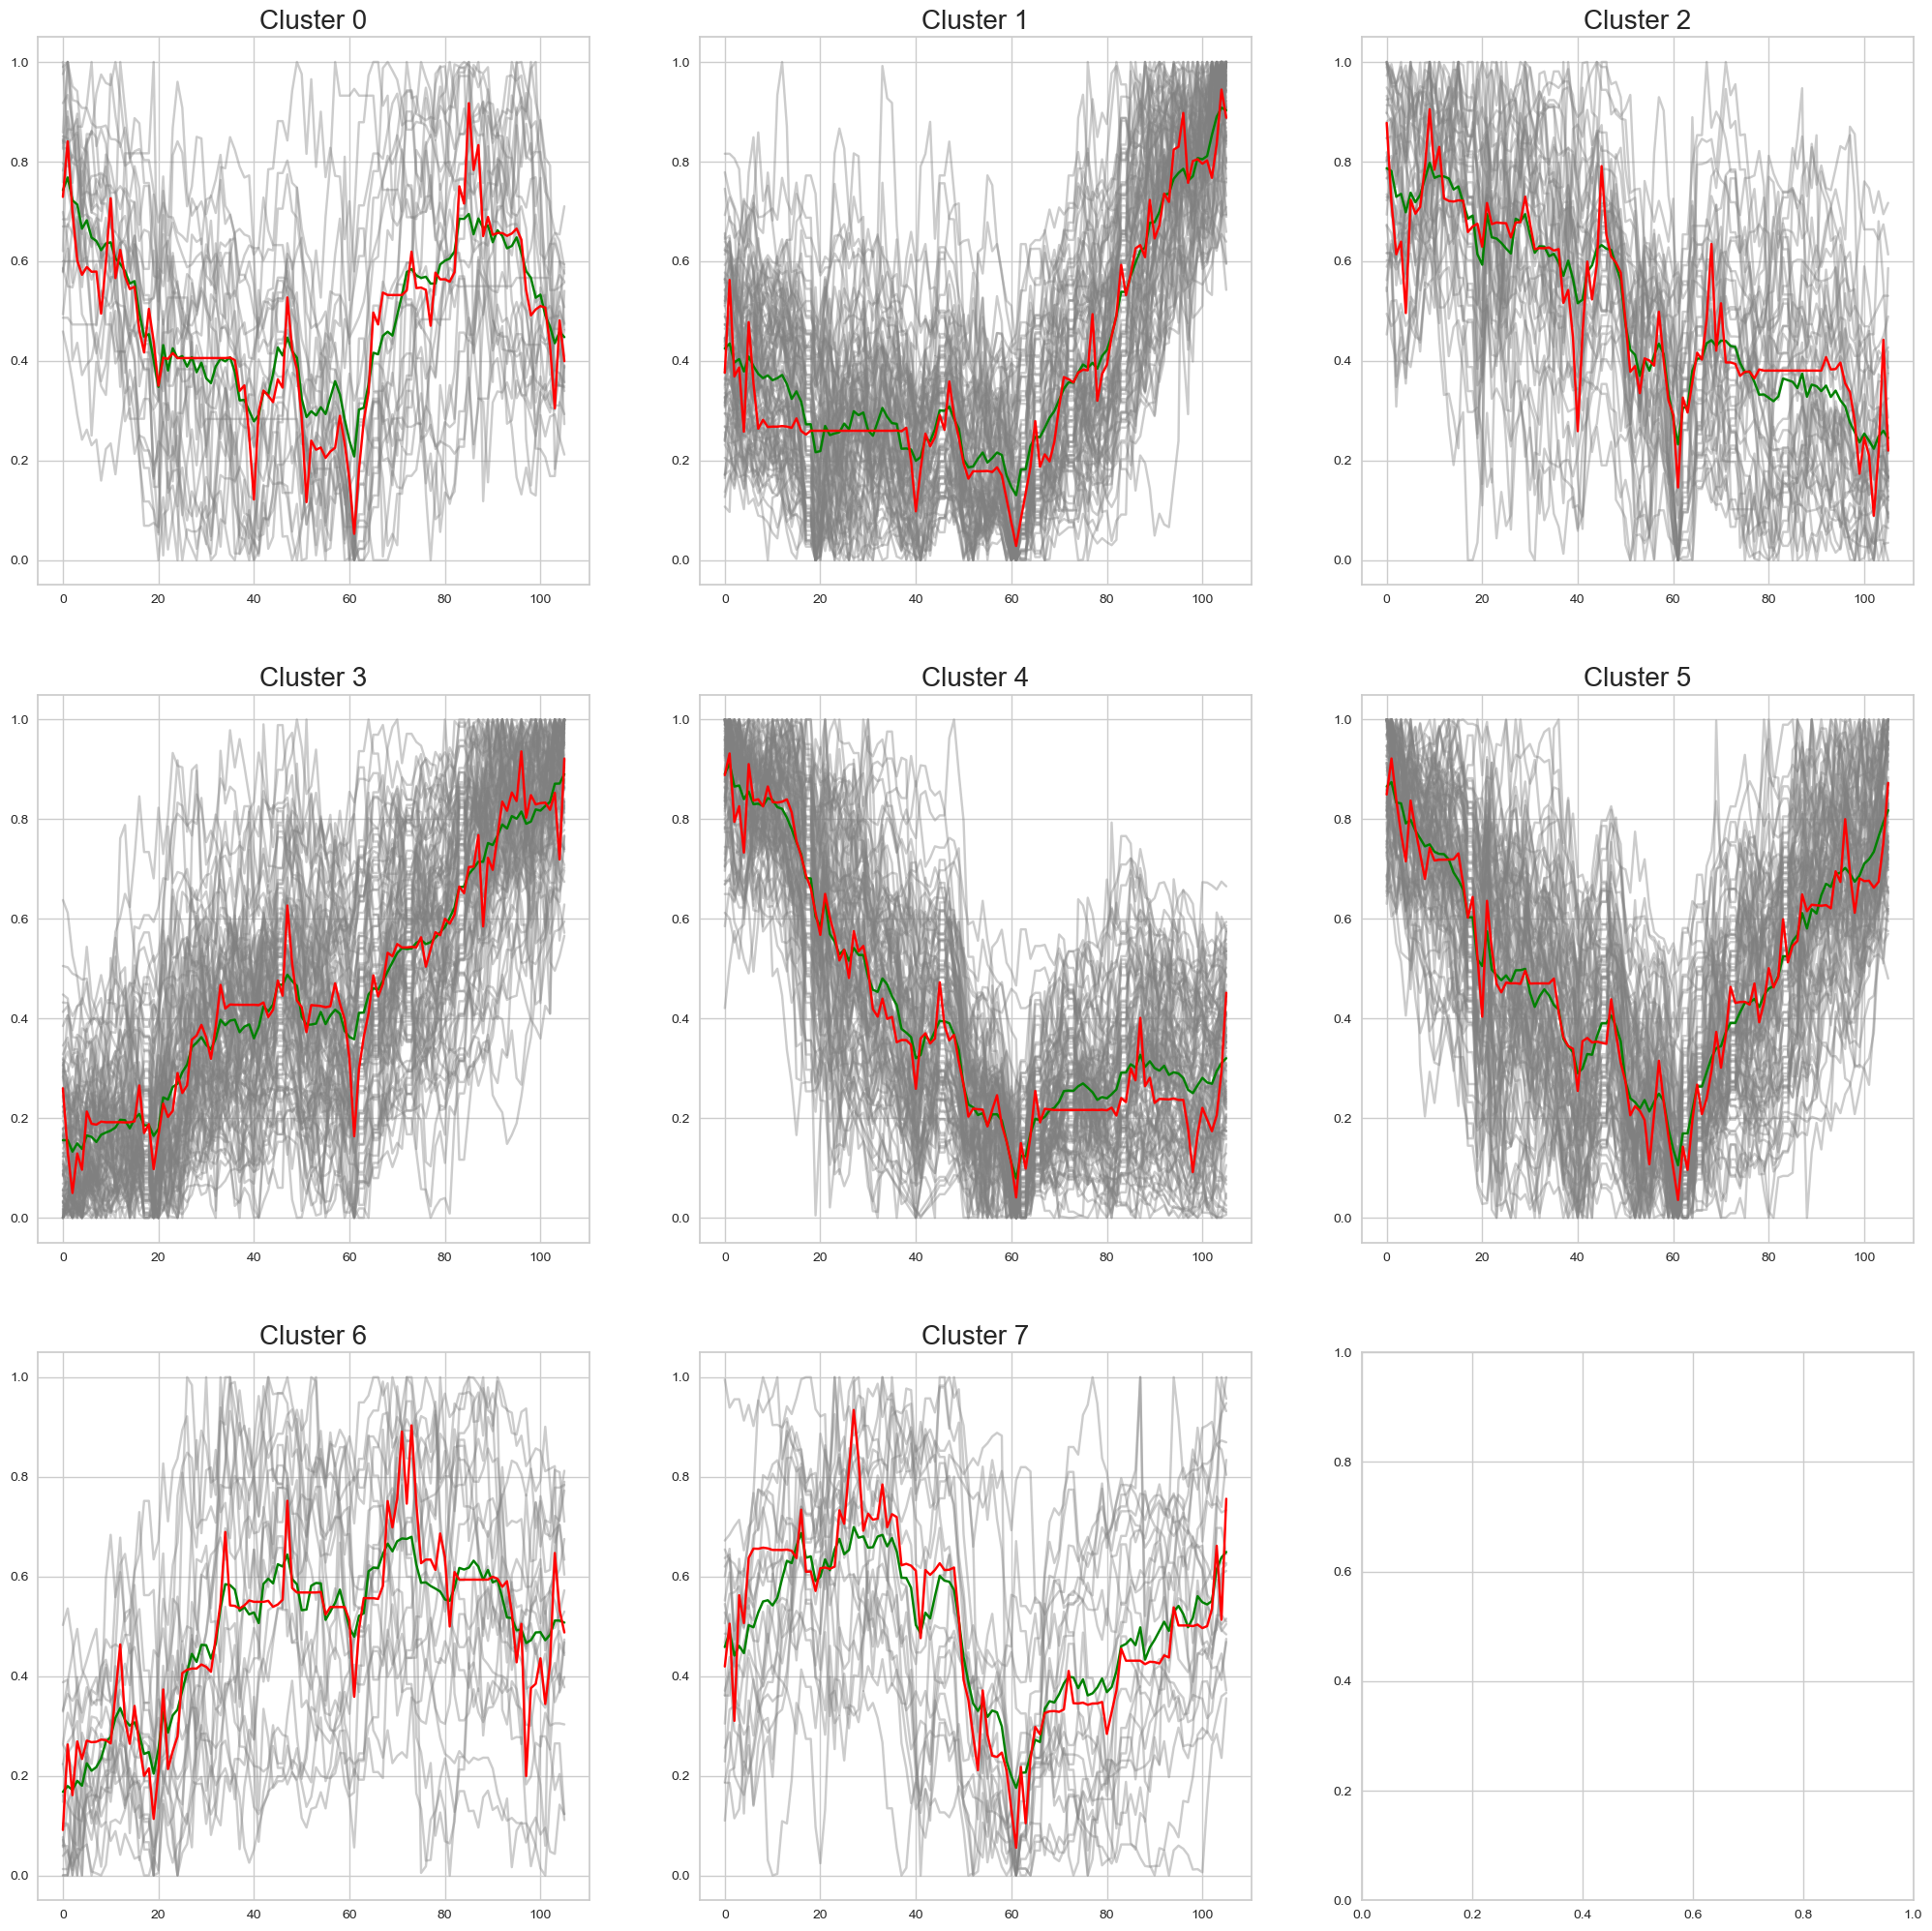

In [32]:
kmeans_clustering.plot_clusters(scaled_df, minmax_cluster_labels)        

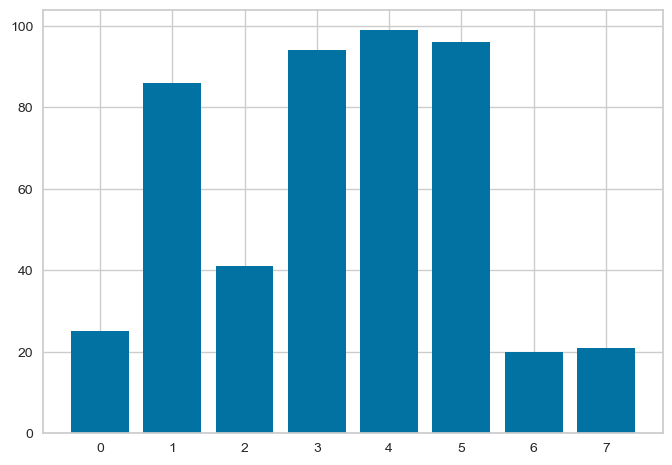

In [33]:
minmax_cluster_labels_dict = Counter(minmax_cluster_labels)
plt.bar(minmax_cluster_labels_dict.keys(), minmax_cluster_labels_dict.values())
plt.show()

### Using Standard Scaling for Scaling

In [41]:
# scale data using log returns
scaling_opt = 'standard'
standard_scaled_df = kmeans_clustering.scaling(stocks_df, scaling_opt)
X = standard_scaled_df.T

CPU times: user 1 µs, sys: 4 µs, total: 5 µs
Wall time: 57.5 µs


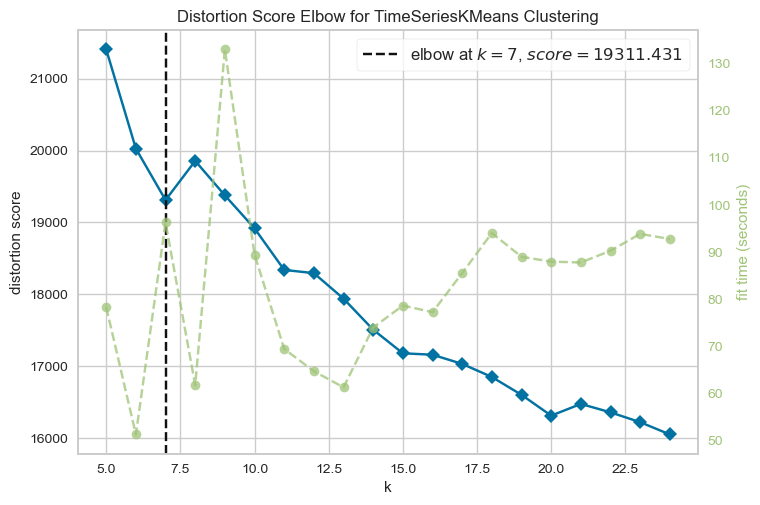

In [42]:
%time
kmeans_clustering.kelbow_visualizer(X)

In [9]:
#### Fit the data to cluster number as per elbow method
kmeans = TimeSeriesKMeans(n_clusters=7, n_jobs=-1, metric='dtw', random_state=seed)
standard_cluster_labels = kmeans.fit_predict(X)

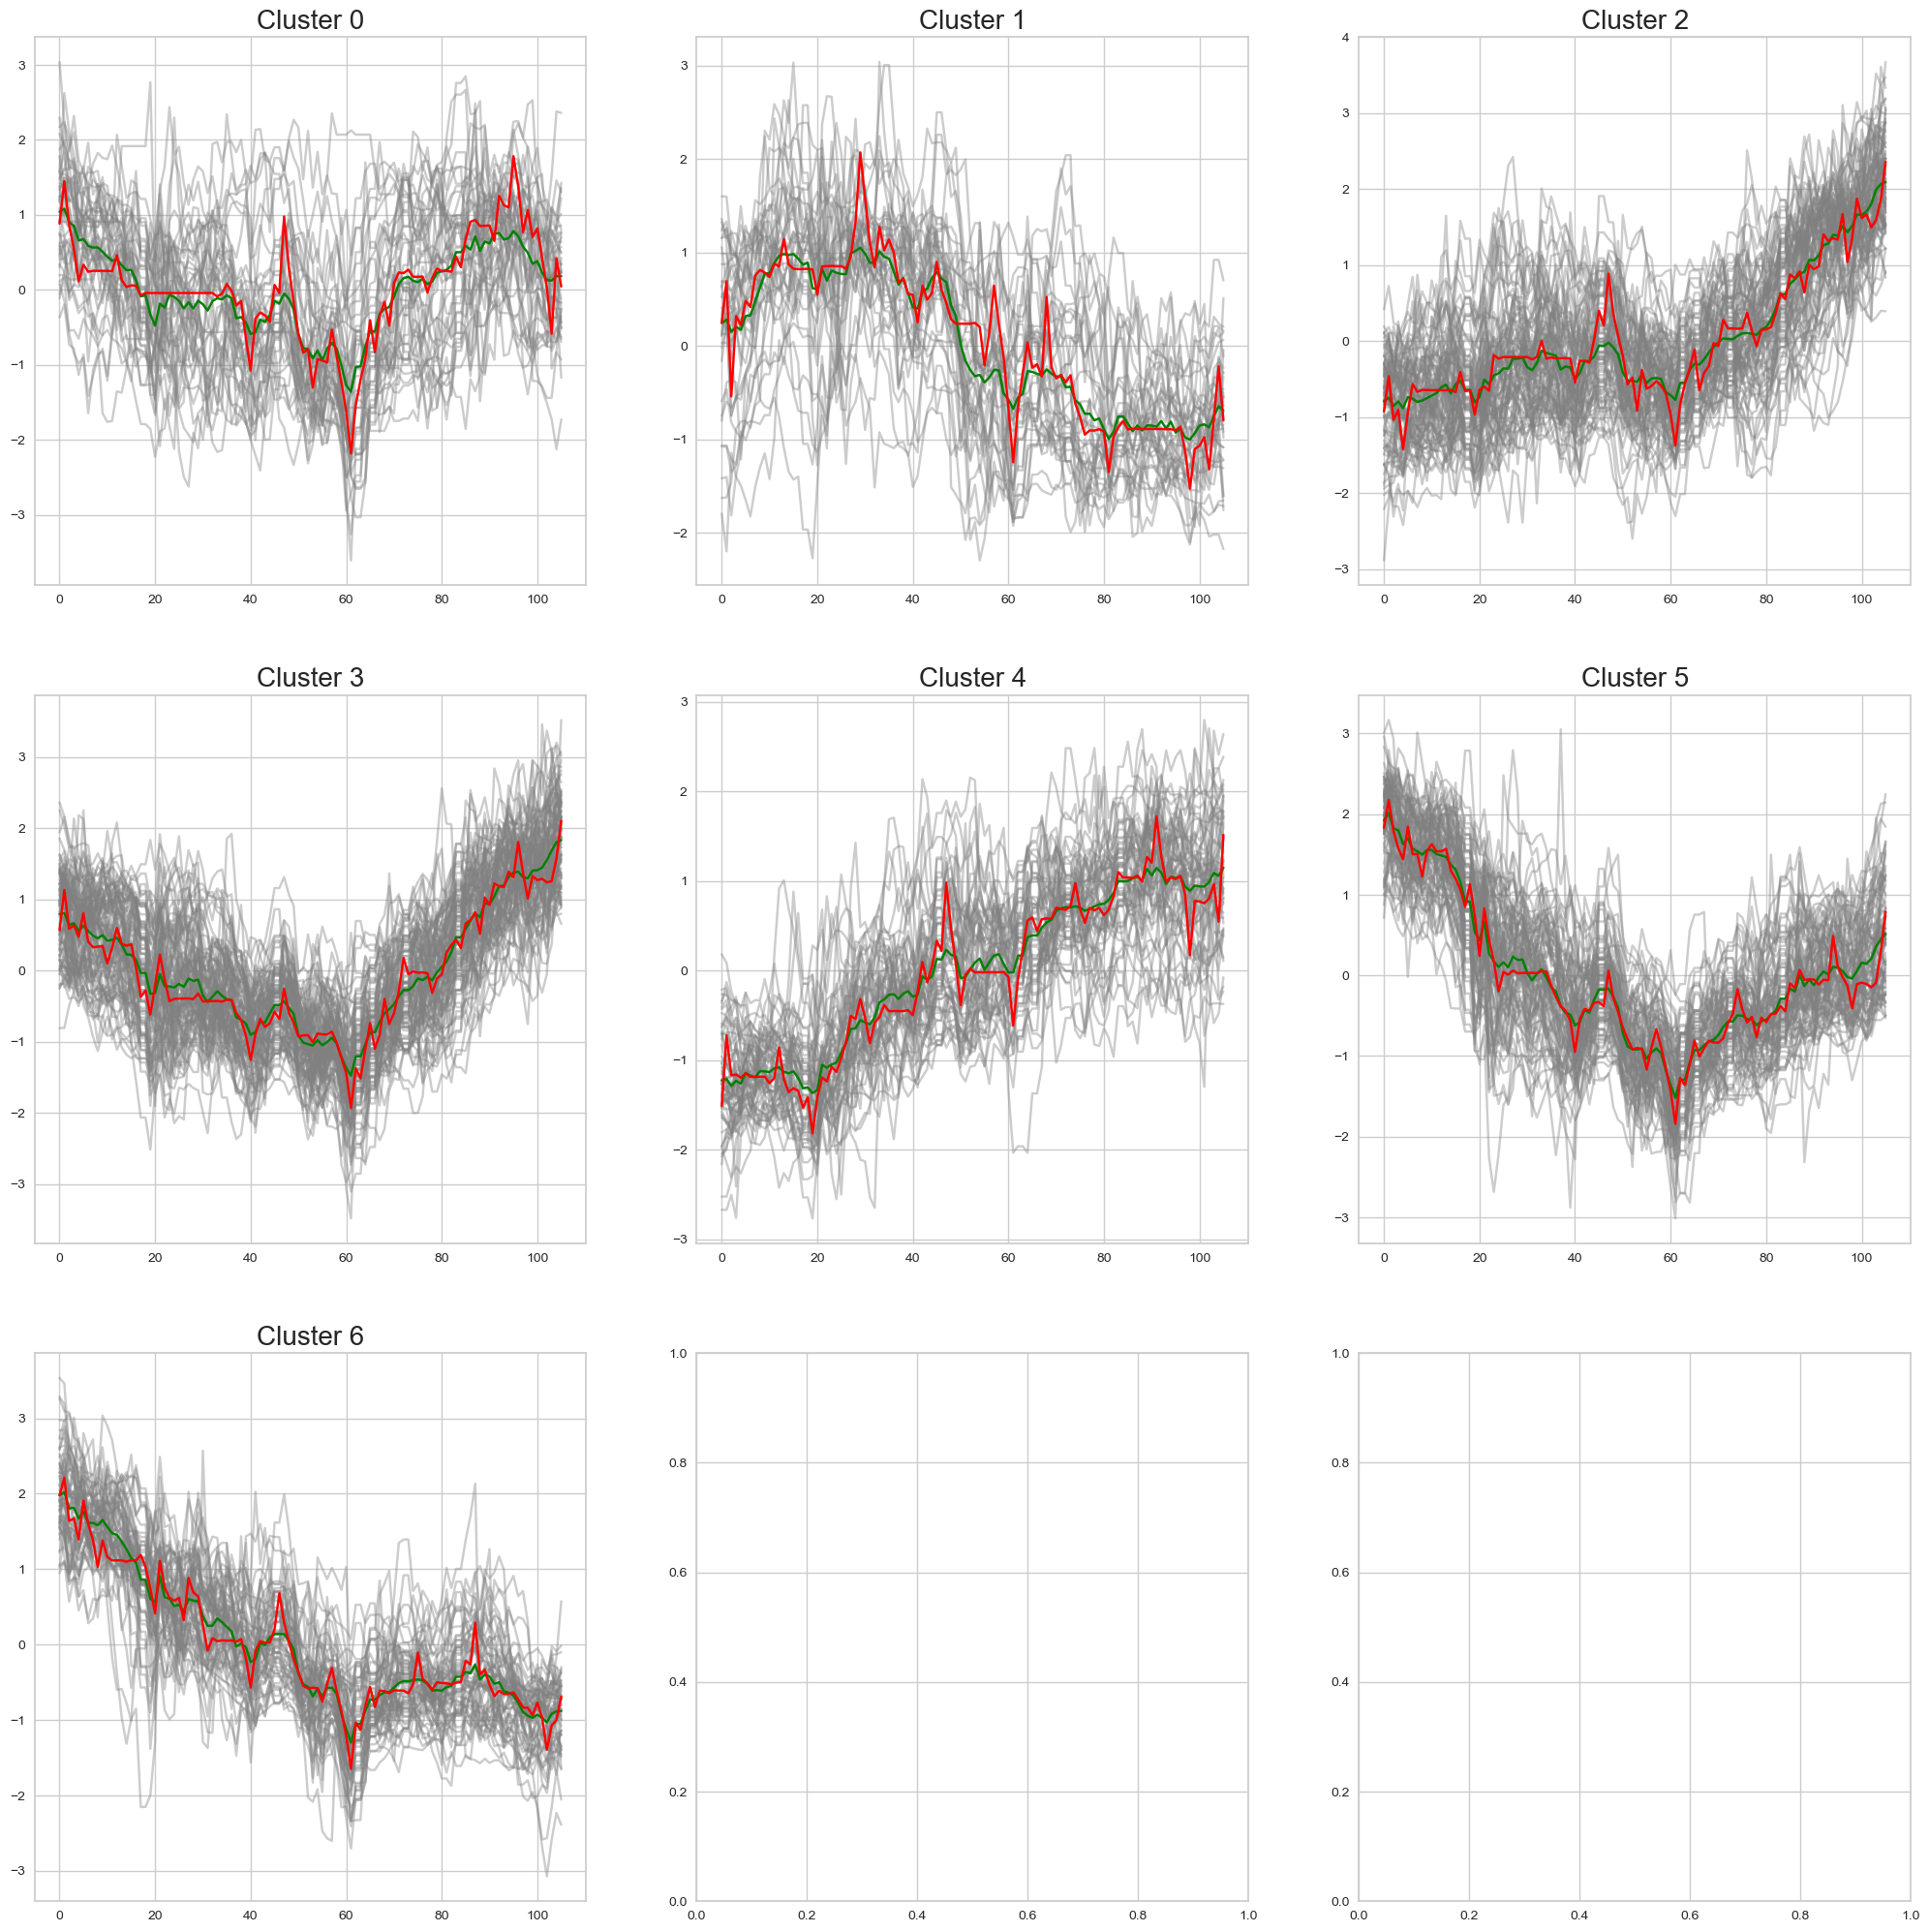

In [10]:
kmeans_clustering.plot_clusters(standard_scaled_df, standard_cluster_labels)

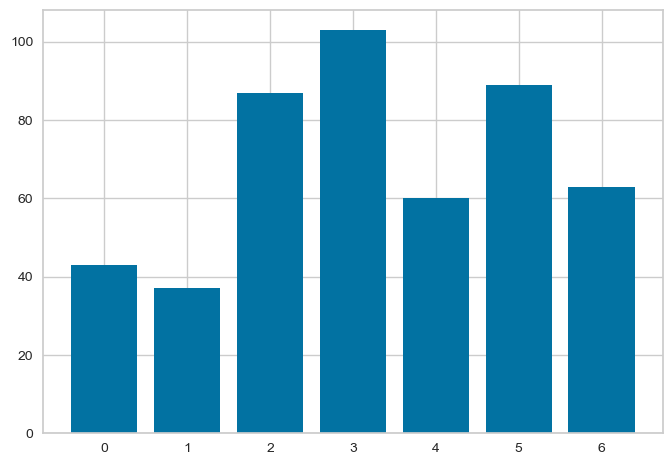

In [11]:
standard_cluster_labels_dict = Counter(standard_cluster_labels)
plt.bar(standard_cluster_labels_dict.keys(), standard_cluster_labels_dict.values())
plt.show()

### 3. Using log returns for Scaling

In [34]:
# scale data using log returns
log_scaled_df = kmeans_clustering.log_returns(stocks_df)
X = log_scaled_df.T

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.77 µs


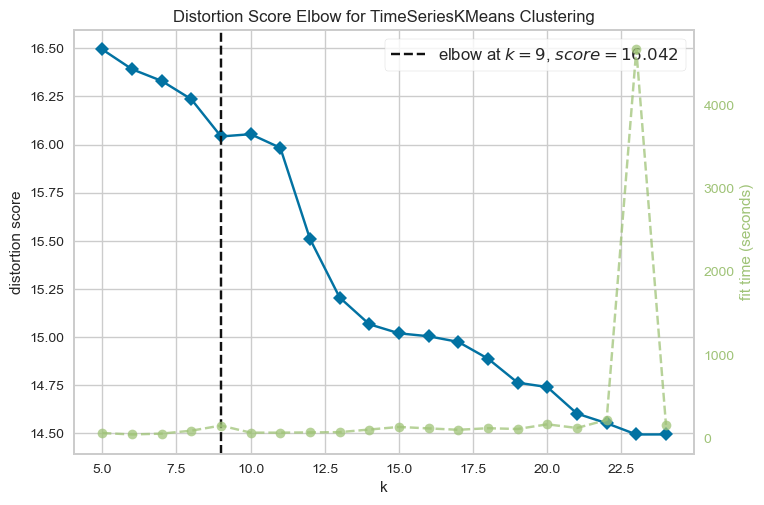

In [35]:
%time
kmeans_clustering.kelbow_visualizer(X)

In [36]:
#### Fit the data to cluster number as per elbow method
kmeans = TimeSeriesKMeans(n_clusters=9, n_jobs=-1, metric='dtw', random_state=seed)
log_cluster_labels = kmeans.fit_predict(X)

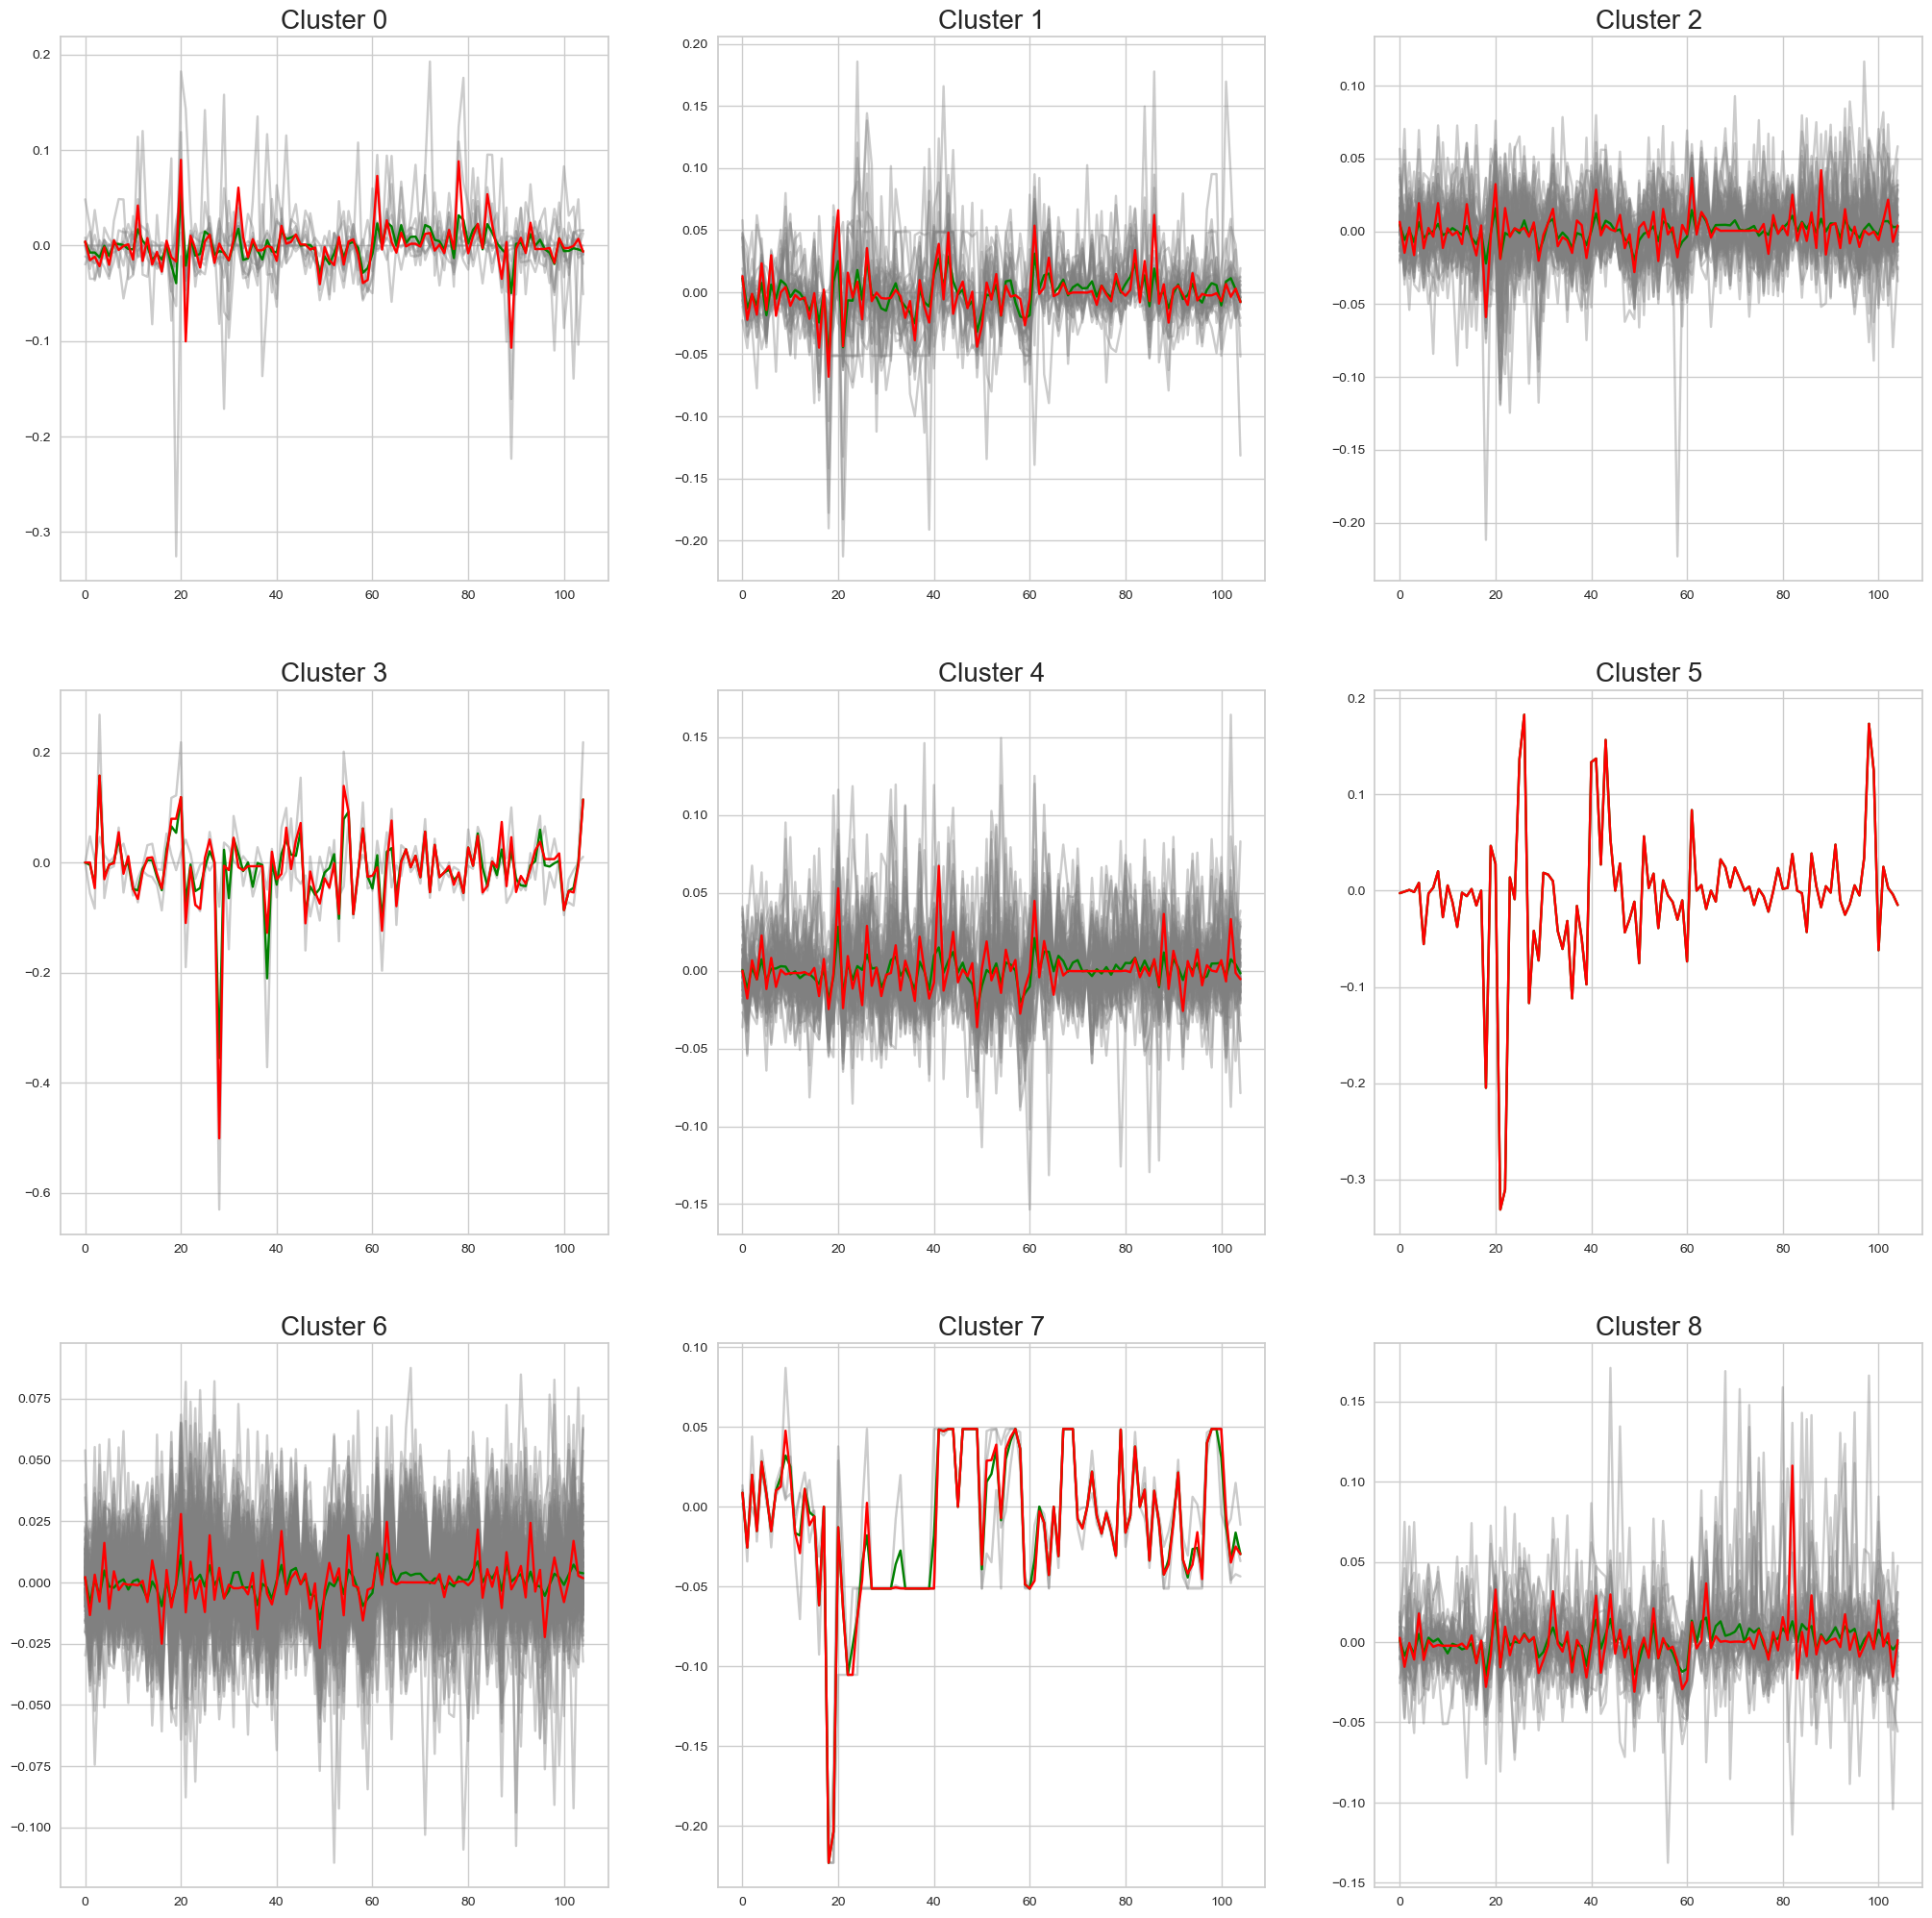

In [37]:
kmeans_clustering.plot_clusters(log_scaled_df, log_cluster_labels)        

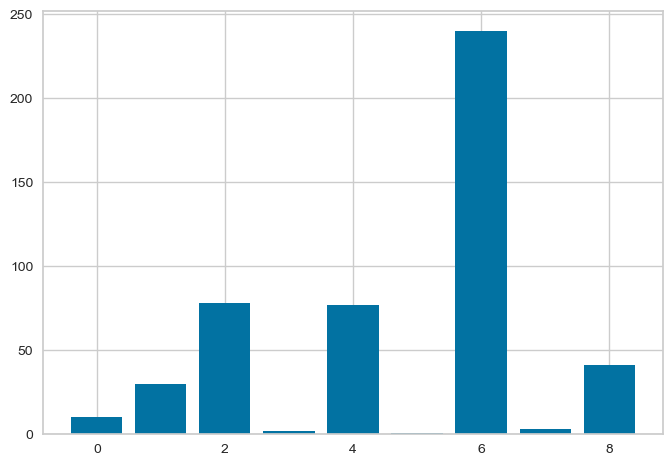

In [38]:
log_cluster_labels_dict = Counter(log_cluster_labels)
plt.bar(log_cluster_labels_dict.keys(), log_cluster_labels_dict.values())
plt.show()

### 4. Using CEEMDAN preprocessing method

In [50]:
# extract IMF features using CEEMDAN
preprocessed_dataset = ceemdan_feature(stocks_df)
X = np.array(preprocessed_dataset)

100%|█████████████████████████████████████████████████████████████████████████████████| 482/482 [16:22<00:00,  2.04s/it]


CPU times: user 2 µs, sys: 8 µs, total: 10 µs
Wall time: 6.68 µs


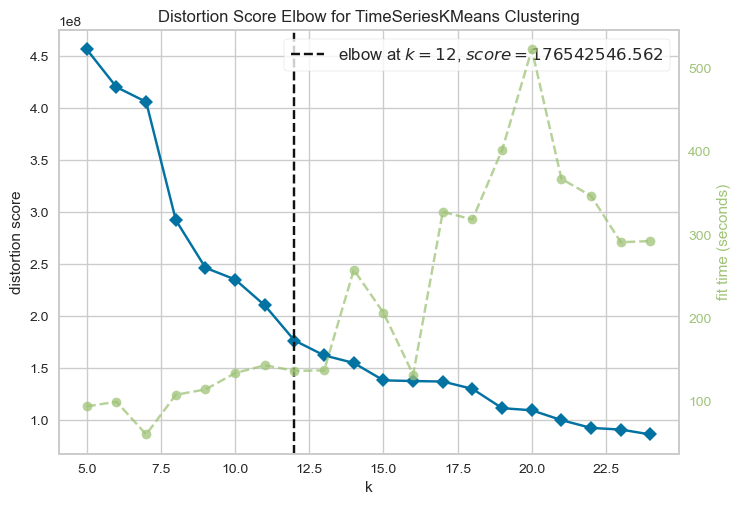

In [51]:
# use k-means to do clusterinf and visualizing the clustering 
%time
kmeans_clustering.kelbow_visualizer(X)

In [52]:
#### Fit the data to cluster number as per elbow method
kmeans = TimeSeriesKMeans(n_clusters=8, n_jobs=-1, metric='dtw', random_state=seed)
ceemdan_cluster_labels = kmeans.fit_predict(X)

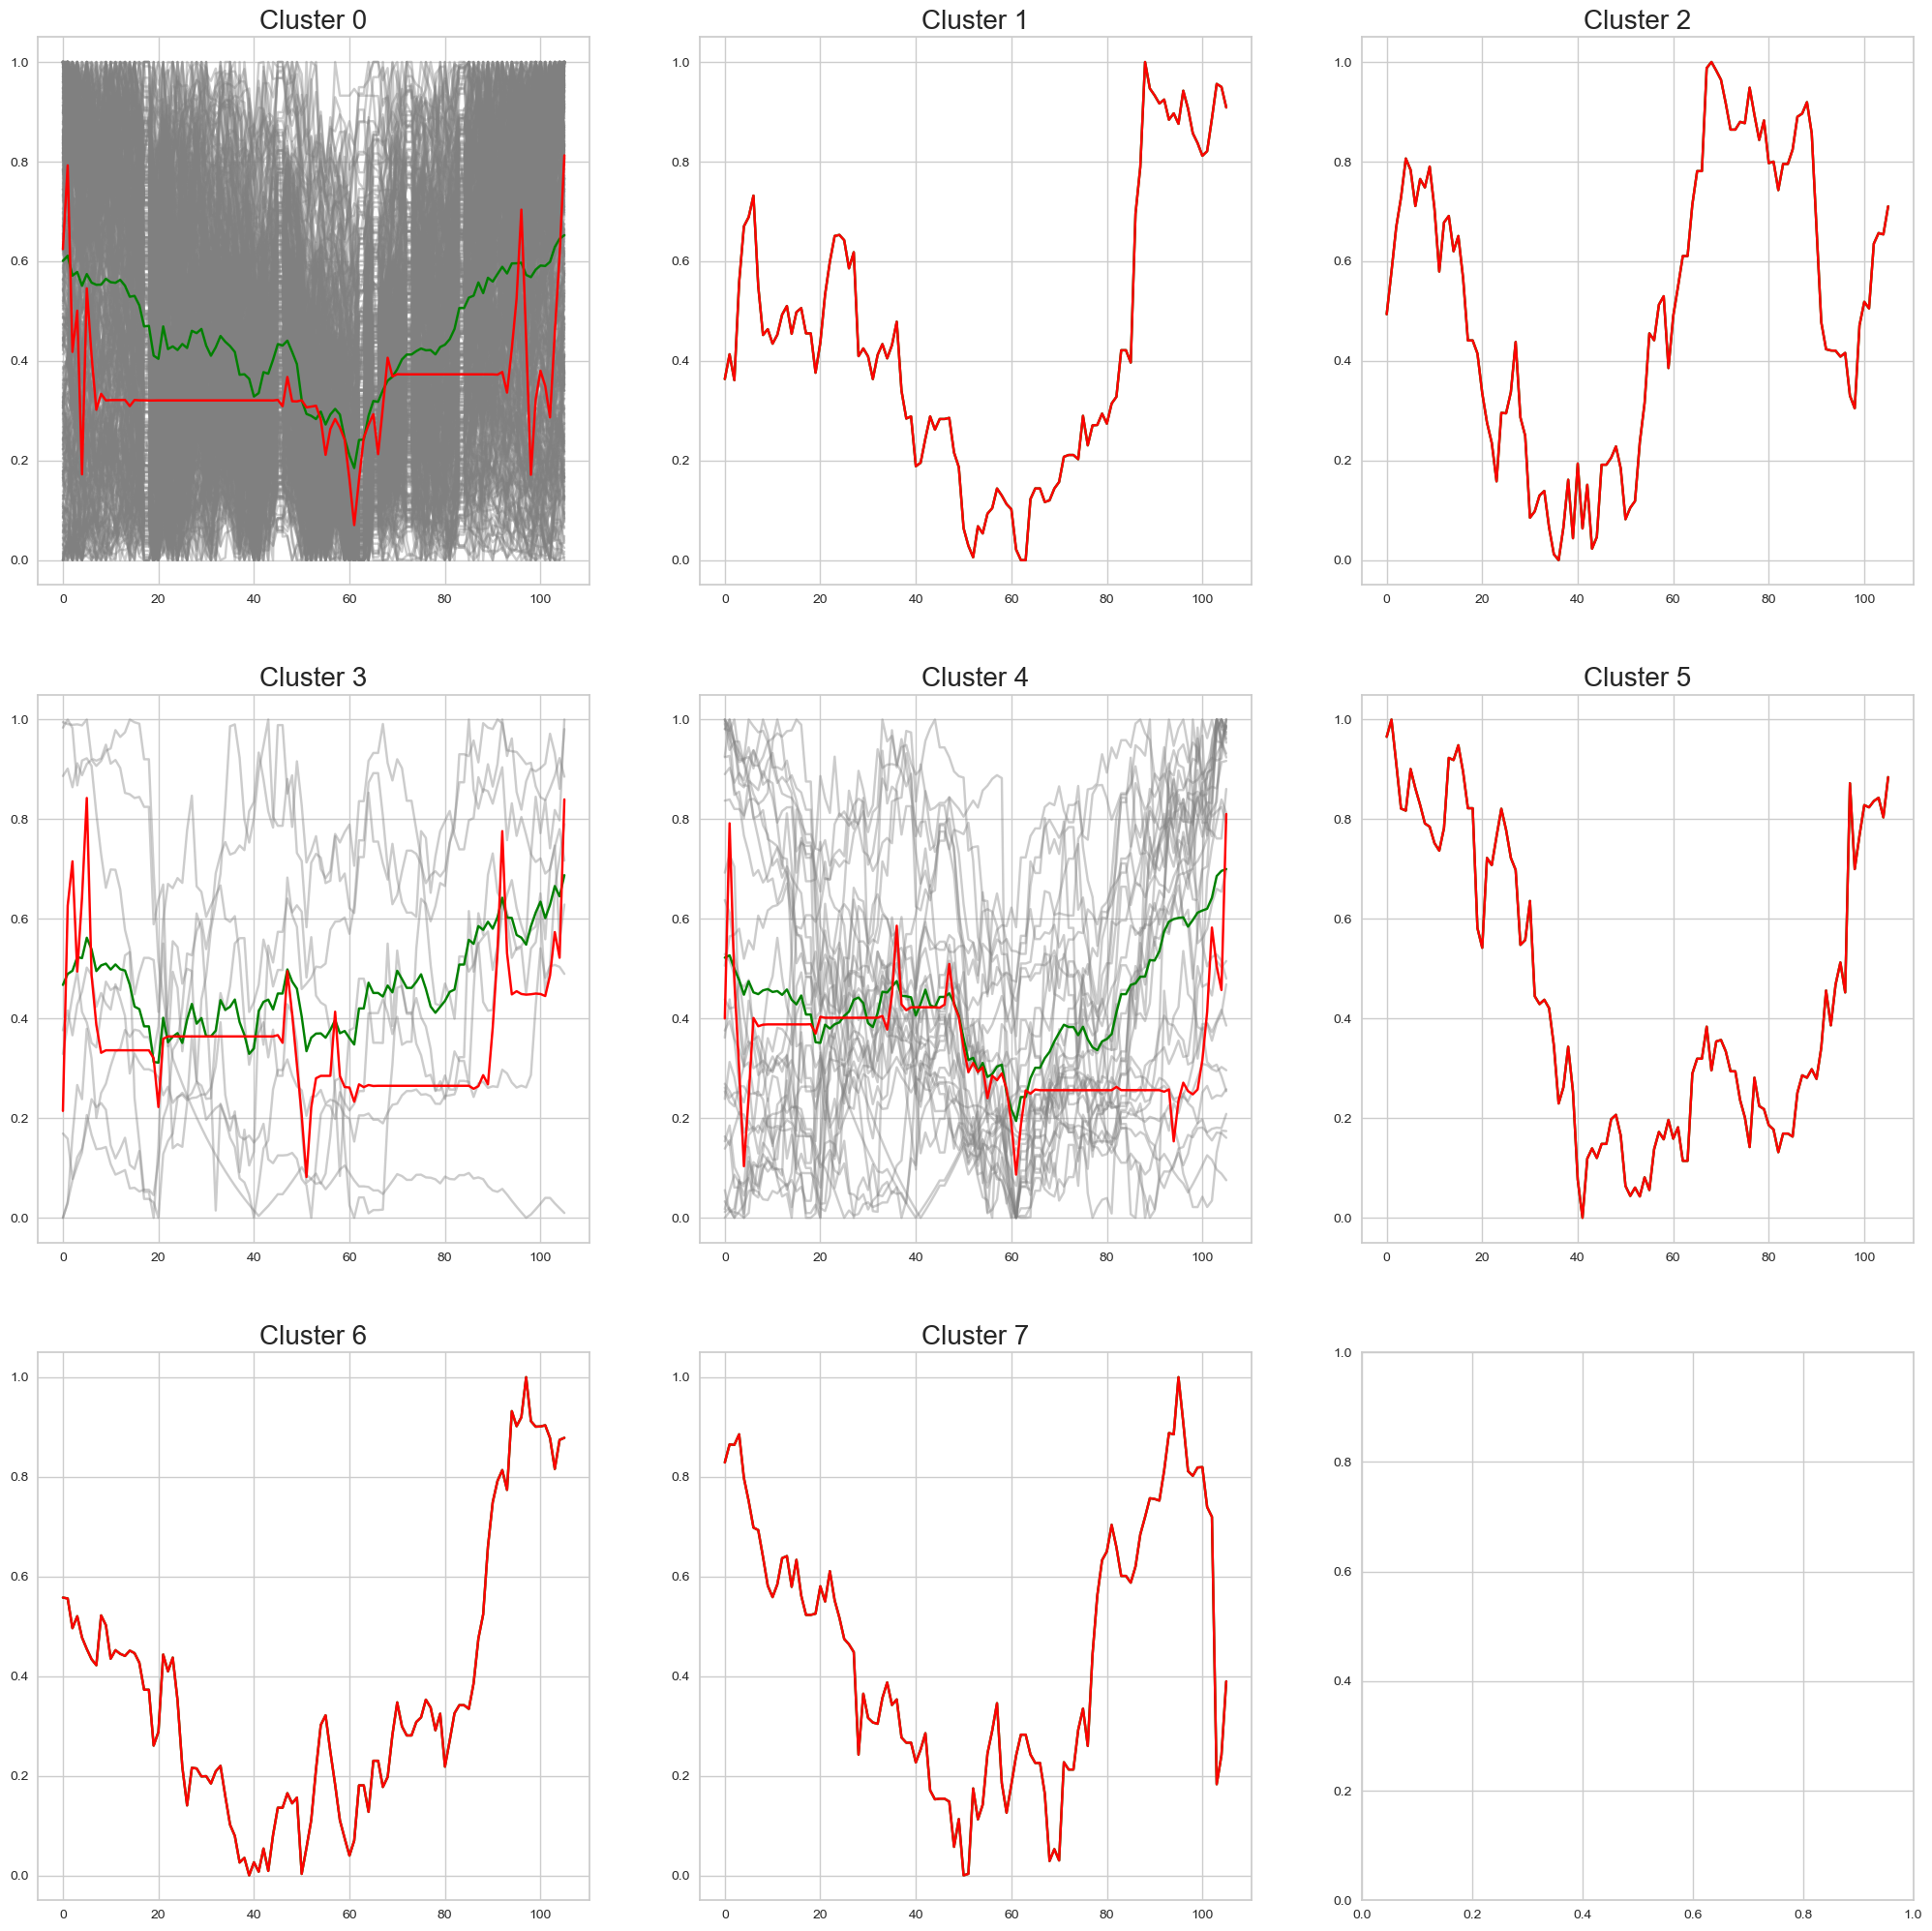

In [53]:
# plot the clusters
kmeans_clustering.plot_clusters(scaled_df, ceemdan_cluster_labels)        

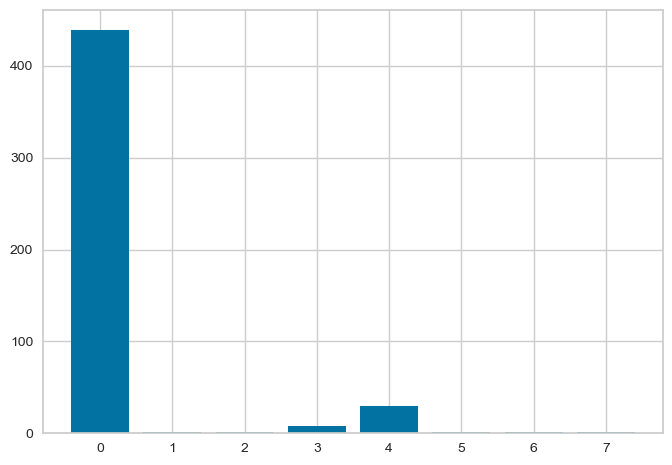

In [54]:
labels_dict = Counter(ceemdan_cluster_labels)
plt.bar(labels_dict.keys(), labels_dict.values())
plt.show()

### Observation: Clustering with StandardScaler is better than others

#### Compute dissimilarity matrix between stocks across clusters

In [55]:
# compute the dissimilarity matrix using DTW(dynamic time warping) metric
dissimilaritys_matrix = dtw.distance_matrix_fast(np.array(standard_scaled_df).T)
dissimilaritys_df = pd.DataFrame(dissimilaritys_matrix)
dissimilaritys_df.head()

0          1          2          3          4         5          6    \
0   0.000000  11.505145   9.942732   7.345978   3.550697  7.596286  13.184772   
1  11.505145   0.000000   8.976077  15.651113  15.003609  6.964591   5.622584   
2   9.942732   8.976077   0.000000   9.692383  13.804357  4.949556   4.135249   
3   7.345978  15.651113   9.692383   0.000000   6.863144  7.536857  12.524393   
4   3.550697  15.003609  13.804357   6.863144   0.000000  8.886867  15.908483   

         7          8          9    ...        472        473       474  \
0   5.653217   5.514618   4.990336  ...  10.650511   8.181775  4.474837   
1  16.630223  15.247442  13.129250  ...   8.465388  12.231892  6.805028   
2  12.021928   8.830128  14.220438  ...   3.108481   4.681387  4.323233   
3   4.352854   4.948692  11.661244  ...   8.412749   7.166857  9.417149   
4   5.084896   6.806939   4.976508  ...  12.175343  10.737714  7.939152   

         475        476        477        478        479        480        481  
0   7.517191   5.673701  14.276948  13.649827  12.067249  13.432918   7.993382  
1  15.469636  15.093168   5.177496   6.218128   6.671695   6.244923  10.080269  
2   9.823071  11.037858  11.026150  11.601590   3.833563   9.028923   5.244147  
3   4.534007   3.148509  18.330102  17.132681  12.774432  15.172143   6.177452  
4   8.432777   5.166559  16.901831  15.472445  16.098367  14.463634   8.273093  

[5 rows x 482 columns]

In [100]:
# extract maximum disimilarity values between ticker pairs across different clusters
max_dissim_df = kmeans_clustering.extract_max_dis_pairs(dissimilaritys_df, standard_cluster_labels)    
max_dissim_df.head(5)

row  col  max_dis_val  cluster_src  cluster_target
0  258  466    20.409269            4               6
1  466  258    20.409269            6               4
2  227  466    20.074778            4               6
3   76  258    20.042442            6               4
4  325  221    20.006995            4               1

In [58]:
# get stocks with maximum dissimilarity 
tickers_df = kmeans_clustering.get_max_dis_stocks(max_dissim_df, standard_cluster_labels, stocks_df)    
tickers_df

ticker_indx  max_dissimilarity_distance  cluster_source       ticker
0        258.0                   20.409269             4.0      KSB3.DE
1        466.0                   20.409269             6.0     VMART.NS
2        221.0                   20.006995             1.0   IPCALAB.NS
3         97.0                   19.492418             2.0  CHOLAFIN.NS
4        448.0                   18.427118             5.0      TTML.NS
5        123.0                   17.974148             3.0       DLF.NS
6        273.0                   16.485905             0.0    LXCHEM.NS

In [80]:
tickers_list = tickers_df.ticker.values.tolist()
# exclude the two tickers - VMART.NS/LXCHEM.NS for which we do not have data for full time series
tickers_list = ['KSB3.DE', 'IPCALAB.NS', 'CHOLAFIN.NS', 'TTML.NS', 'DLF.NS']
tickers_list

['KSB3.DE', 'IPCALAB.NS', 'CHOLAFIN.NS', 'TTML.NS', 'DLF.NS']

In [81]:
plot_df = stocks_df.loc[:, tickers_list].copy()
plot_df = plot_df.reset_index()
melt_df = plot_df.melt(id_vars='Date', value_name='Close Price', var_name='Ticker')
melt_df.head()

Date   Ticker  Close Price
0 2023-01-02  KSB3.DE   327.078186
1 2023-01-03  KSB3.DE   328.996521
2 2023-01-04  KSB3.DE   352.975861
3 2023-01-05  KSB3.DE   343.384125
4 2023-01-06  KSB3.DE   345.302490

In [79]:
import plotly.express as px
fig= px.line(melt_df, x='Date', y='Close Price', color='Ticker')
fig.show()

### Extract Ticker Info 

In [84]:
# download tickers info for the shortlisted tickers
# ticker_info_df = kmeans_clustering.get_ticker_info(tickers_list)    

In [99]:
# tickerinfopath = '../../datasets/ticker_info.csv'
# ticker_info_df.to_csv(tickerinfopath, index=False)

In [98]:
ticker_info_df = pd.read_csv(tickerinfopath)
ticker_info_df

symbol                                industry  \
0      TTML.NS                        Telecom Services   
1  CHOLAFIN.NS                         Credit Services   
2      KSB3.DE          Specialty Industrial Machinery   
3       DLF.NS                 Real Estate—Development   
4   IPCALAB.NS  Drug Manufacturers—Specialty & Generic   

                   sector      marketCap                shortName  \
0  Communication Services   144938860544        TATA TELESERVICES   
1      Financial Services   934083100672        CHOLAMANDALAM INV   
2             Industrials      948018944  KSB SE+CO.KGAA VZO O.N.   
3             Real Estate  1239511465984              DLF LIMITED   
4              Healthcare   194146992128        IPCA LABORATORIES   

   revenuePerShare  currentPrice  totalRevenue  revenueGrowth  \
0            5.658         74.10   11061699584          0.028   
1           76.526       1136.05   62863601664          0.235   
2         1470.372        504.00    2575102976          0.159   
3           22.994        500.75   56948301824         -0.059   
4          246.159        765.25   62443200512          0.172   

   operatingMargins                                longBusinessSummary  
0           0.31587  Tata Teleservices (Maharashtra) Limited provid...  
1           0.57499  Cholamandalam Investment and Finance Company L...  
2           0.06243  KSB SE & Co. KGaA, together with its subsidiar...  
3           0.27696  DLF Limited, together with its subsidiaries, e...  
4           0.10653  Ipca Laboratories Limited manufactures and mar...